In [2]:
#--------------------------------
# pyspark --packages com.databricks:spark-xml_2.10:0.4.1

import sys
import os
import pyspark
from pyspark.sql import SparkSession
import pyspark.sql.functions as func
from pyspark.sql.functions import *
from pyspark.sql.types import StringType, IntegerType, StructType, StructField, DoubleType, FloatType, DateType, TimestampType
from pyspark.sql.functions import date_format, col, desc, udf, from_unixtime, unix_timestamp, date_sub, date_add, last_day
import time


In [2]:
# df = spark.read.data()
# pyspark --master yarn-client
# ------------------------------
# Terminal command ------------------------------------------------
# df = spark.read.format('com.databricks.spark.xml').options(rowTag='HistoricalTextData').load('/home/koukira/IoT_Predictive_Maintenance_Demo/rw_XML_train')

# df.show()

# df = df.withColumn("TimeStamp", df["TimeStamp"].cast("timestamp")).groupBy("TimeStamp").pivot("TagName").sum("TagValue").na.fill(0)

# df.repartition(1).write.csv("rw_etl.csv", header=True, sep=",")


#--------------spark.sql trail
# query = "SELECT origin, dest, COUNT(*) as N FROM flights GROUP BY origin, dest"

# # Run the query
# flight_counts = spark.sql(query)

# # Convert the results to a pandas DataFrame
# pd_counts = flight_counts.toPandas()

# # Print the head of pd_counts
# print(pd_counts.head())

#terminal執行 spark-submit  --packages com.databricks:spark-xml_2.10:0.4.1 /home/koukira/IoT_Predictive_Maintenance_Demo/rw_XML_train/Sensor_ETLsparksubmit.py

In [1]:
import os
import pandas as pd
import csv
import numpy as np
import random
import re
import csv
import glob
import matplotlib
import matplotlib.pyplot as plt
import random
from IPython import get_ipython
get_ipython().magic('%matplotlib inline')
# df2 = pd.read_csv('/home/koukira/IoT_Predictive_Maintenance_Demo/rw_etl.csv/scara',sep= '\t',low_memory=False) #.sort_values(['TimeStamp'], ascending=True).reset_index()
# # df3 = pd.read_csv('/home/koukira/IoT_Predictive_Maintenance_Demo/rw_etl.csv/bind',sep= '\t',low_memory=False) #.sort_values(['TimeStamp'], ascending=True).reset_index()
# df3 = pd.read_csv('/home/koukira/IoT_Predictive_Maintenance_Demo/pure/scara227-1',sep='\t',low_memory=False) #.sort_values(['TimeStamp'], ascending=True).reset_index()

# # df3.drop(columns = ['TimeStamp'])
# # df2['TimeStamp'].drop
# # del df3['TimeStamp']
# # df2['J3ActualPosition'].plot()
# # df[df['J1ActualPosition'].max()]
# # df2[df2.J3ActualPosition==df2.J3ActualPosition.min()]
# # df3.to_csv("scara227-1",sep='\t',encoding='utf-8')
# # df.plot()
# # df3.mean()
# df3.head()
# df3.shape # 列出行列row,col

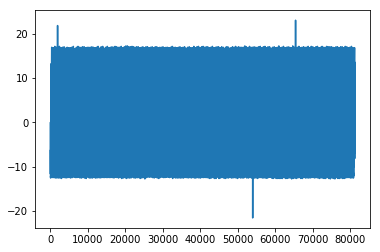

In [148]:
# df2['J1qcmd'].plot()

# preprocessing

In [2]:
# df2 = pd.read_csv('/home/koukira/下載/scara0.csv').sort_values(['TimeStamp'], ascending=True).reset_index()
# df2['TimeStamp']=pd.to_datetime(df['TimeStamp'])
# df2=pd.read_csv('/home/koukira/下載/scara0.csv')
# df2.head(5)
df = pd.read_csv('/home/koukira/IoT_Predictive_Maintenance_Demo/rw_etl.csv/complete.csv').sort_values(['TimeStamp'], ascending=True).reset_index()
df.drop(['::[scararobot]Ax_J1.PositionCommand','::[scararobot]Ax_J1.TorqueFeedback','::[scararobot]Ax_J2.PositionCommand','::[scararobot]Ax_J2.TorqueFeedback','::[scararobot]Ax_J3.TorqueFeedback','::[scararobot]Ax_J6.TorqueFeedback','::[scararobot]ScanTimeAverage','::[scararobot]Ax_J6.PositionCommand','::[scararobot]Ax_J3.PositionCommand','index'], axis=1, inplace=True)
df['TimeStamp']=pd.to_datetime(df['TimeStamp'])

df.loc[:,'TimeStamp']=df['TimeStamp'].apply(lambda x:x.replace(year=2018))
# df.TimeStamp + pd.offsets.MonthOffset(4)
df_TimeStamp = df.TimeStamp+pd.offsets.MonthOffset(4)
df['TimeStamp']=df_TimeStamp
df=df.rename(index=str,columns={
    "Timestamp":"timestamp",
    "::[scararobot]Ax_J1.ActualPosition":"J1ActualPosition",
    '::[scararobot]Ax_J1.PositionError':"J1PositionError",
       '::[scararobot]Ax_J1.TorqueCommand':"J1qcmd",
       '::[scararobot]Ax_J2.ActualPosition':"J2ActualPosition",
       '::[scararobot]Ax_J2.PositionError':"J2PositionError",
       '::[scararobot]Ax_J2.TorqueCommand':"J2qcmd",
       '::[scararobot]Ax_J3.ActualPosition':"J3ActualPosition",
       '::[scararobot]Ax_J3.PositionError':"J3PositionError",
       '::[scararobot]Ax_J3.TorqueCommand':"J3qcmd",
       '::[scararobot]Ax_J6.ActualPosition':"J4ActualPosition",
       '::[scararobot]Ax_J6.PositionError':"J4PositionError",
       '::[scararobot]Ax_J6.TorqueCommand':"J4qcmd",
       '::[scararobot]CS_Cartesian.ActualPosition[0]':"cs_ActualPosition0",
       '::[scararobot]CS_Cartesian.ActualPosition[1]':"cs_ActualPosition1",
       '::[scararobot]CS_Cartesian.ActualPosition[2]':"cs_ActualPosition2",
       '::[scararobot]CS_SCARA.ActualPosition[0]':"ActualPosition0",
       '::[scararobot]CS_SCARA.ActualPosition[1]':"ActualPosition1",
       '::[scararobot]CS_SCARA.ActualPosition[2]':"ActualPosition2",
        '::[scararobot]speed':"speed"
                            })
# df.iloc[54101].drop

# df['TimeStamp'].drop
df.head()
plt.plot(df['J1PositionError'][65])
# df.tail(10)
# (df['TimeStamp'])
# print(df.head(10))
# df.to_csv("scara0",sep='\t',encoding='utf-8')

TimeStamp  J1ActualPosition  J1PositionError  J1qcmd  \
0 2018-11-22 14:03:04.286          0.000000         0.000000     0.0   
1 2018-11-22 14:03:04.291        112.674340         0.735912    25.4   
2 2018-11-22 14:03:04.336          0.000000         0.000000     0.0   
3 2018-11-22 14:03:04.339        115.213134         0.737352    25.0   
4 2018-11-22 14:03:04.386          0.000000         0.000000     0.0   

   J2ActualPosition  J2PositionError  J2qcmd  J3ActualPosition  \
0          0.000000         0.000000     0.0          0.000000   
1       -110.491546         0.033982     6.0         19.827126   
2          0.000000         0.000000     0.0          0.000000   
3       -110.458916         0.033428     5.8         20.243126   
4          0.000000         0.000000     0.0          0.000000   

   J3PositionError      J3qcmd  J4ActualPosition  J4PositionError  J4qcmd  \
0         0.000000    0.000000          0.000000         0.000000     0.0   
1         1.262876  114.400002       -635.946778        -5.442004   -23.6   
2         0.000000    0.000000          0.000000         0.000000     0.0   
3         1.278876  114.800004       -647.733094        -5.510362   -23.2   
4         0.000000    0.000000          0.000000         0.000000     0.0   

   cs_ActualPosition0  cs_ActualPosition1  cs_ActualPosition2  \
0            0.000000            0.000000             0.00000   
1          641.008422          306.208008            -0.42924   
2            0.000000            0.000000             0.00000   
3          634.057374          320.466828            -0.39632   
4            0.000000            0.000000             0.00000   

   ActualPosition0  ActualPosition1  ActualPosition2  speed  
0         0.000000         0.000000          0.00000    0.0  
1       112.674340      -110.491546         -0.42924  200.0  
2         0.000000         0.000000          0.00000    0.0  
3       115.213134      -110.458916         -0.39632  200.0  
4         0.000000         0.000000          0.00000    0.0

In [1]:
# k =df[df.cs_ActualPosition1==df.cs_ActualPosition1.max()].index
# k2 =df[df.cs_ActualPosition2==df.cs_ActualPosition2.max()].index

# j = df[df.J1ActualPosition==df.J1ActualPosition.max()].index
# j2 = df[df.J2ActualPosition==df.J2ActualPosition.max()].index
# l = df[df.speed==df.speed.max()].index
# df = df.drop(j&k&l&k2&j2)
# # ll = df[df.speed==df.speed.max()].index
# # df = df.drop(ll)
# # df=df.drop(df[df.speed==df.speed.max()].index)
# # df = df.drop(df.TimeStamp)
# # print(df[df.speed==df.speed.max()])
# df['J1ActualPosition'].plot()
# # df.info()

世界座標＝卡式座標

In [164]:
# df.info() ;df.columns;df.describe()
# df['speed'].max();
# df.mean()
# for row in df.iterrows():
#     print(row['c1'], row['c2'])

# for j,row in range(0,len(df)):
#     for i in df:

        
for i, row in df2.iterrows():
    for j, column in row.iteritems():
        try:
            if column != 0:
                column = column + 4*np.random.randn()-6*np.random.randn()
#                 print(column)
            else:
                continue
        except Exception:
            continue


df2.to_csv("scara1-16",sep='\t',encoding='utf-8')
            
# for i in df['J1ActualPosition']:
#     if i != 0 :
#         i = i + np.random.randn()+np.random.random()
# #         print(i)
#     else:
#         continue
# for i in df['J1PositionError']:
#     if i != 0 :
#         i+= np.random.randn()
# #         print(i)
#     else:
#         continue
# for i in df['J2ActualPosition']:
#     if i != 0 :
#          i = i + np.random.randn() - np.random.random()
# #         print(i)
#     else:
#         continue
# for i in df['J3ActualPosition']:
#     if i != 0 :
#         i+= np.random.randn()
# #         print(i)
#     else:
#         continue
# for i in df['J3PositionError']:
#     if i != 0 :
#         i+= np.random.randn()
# #         print(i)
#     else:
#         continue
# for i in df['J4ActualPosition']:
#     if i != 0 :
#         i+= np.random.randn() + np.random.random()
# #         print(i)
#     else:
#         continue
# for i in df['J4PositionError']:
#     if i != 0 :
#         i+= np.random.randn()
# #         print(i)
#     else:
#         continue


# for i in df['cs_ActualPosition0']:
#     if i != 0 :
#         i+= np.random.randn()*2
# #         print(i)
#     else:
#         continue
# for i in df['cs_ActualPosition1']:
#     if i != 0 :
#         i+= np.random.randn()*2
# #         print(i)
#     else:
#         continue
# for i in df['cs_ActualPosition2']:
#     if i != 0 :
#         i+= np.random.randn() - np.random.random()
# #         print(i)
#     else:
#         continue

# for i in df['ActualPosition0']:
#     if i != 0 :
#         i+= np.random.randn()*2
#     else:
#         continue
# for i in df['ActualPosition1']:
#     if i != 0 :
#         i+= np.random.randn()*2
#     else:
#         continue
# for i in df['ActualPosition2']:
#     if i != 0 :
#         i+= np.random.randn() - np.random.random()
#     else:
#         continue
# for i in df['speed']:
#     if i != 0 :
#         i+= np.random.randn() - np.random.random()
#     else:
#         continue


# print(df[df.J1ActualPosition==df.J1ActualPosition.max()]) #54101
# print(df[df.J1PositionError==df.J1PositionError.min()]) #33 ,min>>81381
# print(df[df.J1qcmd==df.J1qcmd.min()])  #54101
############# J2
# print(df[df.J2ActualPosition==df.J2ActualPosition.min()])  #54101
# print(df[df.J2PositionError==df.J2PositionError.max()])
# print(df[df.J2qcmd==df.J2qcmd.max()])
############# J3
# print(df[df.J3ActualPosition==df.J3ActualPosition.min()]) #65421
# print(df[df.J3PositionError==df.J3PositionError.max()]) # 54101
# print(df[df.J3qcmd==df.J3qcmd.max()])  # 54101
############# J4-sphere
# print(df[df.J4ActualPosition==df.J4ActualPosition.min()]) #54101
# print(df[df.J4PositionError==df.J4PositionError.max()]) # 54101
# print(df[df.J4qcmd==df.J4qcmd.min()])  # 54101
# # ############# cs
# print(df[df.cs_ActualPosition0==df.cs_ActualPosition0.max()]) #54101
# print(df[df.cs_ActualPosition1==df.cs_ActualPosition1.max()]) # min>>>65421 min>>>54101
# print(df[df.cs_ActualPosition2==df.cs_ActualPosition2.min()])  # 54101
############# Actual
# print(df[df.ActualPosition0==df.ActualPosition0.max()]) #54101
# print(df[df.ActualPosition1==df.ActualPosition1.min()]) # 54101
# print(df[df.ActualPosition2==df.ActualPosition2.min()])  # 54101
# print(df[df.speed==df.speed.max()])  # 54101

# df['speed'].plot() 

# df.ActualPosition2
# df.query(df.speed>199)
# df['cs_ActualPosition0'].mean()
# df.var()
# df.mean()
# df.head()
# type(df) # df.shape #df.columns #type(df.columns) # df.info()
# slicing

In [ ]:
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from pandas.plotting import andrews_curves
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from matplotlib import cm
# %matplotlib inline #clear the layout
# plotly.tools.set_credentials_file(username='Rmj009',api_key='••••••••••') #KuronLin ••••••••••
plotly.tools.set_credentials_file(username='KuronLin',api_key='oAgmByFI8KVJXexNp') 

# df.plot(x="TimeStamp", y="J1.qcmd", kind="line")
# df.plot(x="TimeStamp", y=["J1.ActualPosition","J3.qcmd","speed"], kind="line")
# df.plot(x="TimeStamp", y=["cs_ActualPosition0","cs_ActualPosition1"], kind="line")
# df.plot() ;plt.title('Scara posture'); plt.xlabel('cycles') ;plt.ylabel('fluction rate%')
# plt.figure() #佈置一張畫表
# andrews_curves(df,name=df['J1.qcmd']) # data 排列不同
# lag_plot(df['speed'])

# plt.figure()
# autocorrelation_plot(df['J1qcmd'])
plt.figure()

# df.pd.boxplot(figsize=(10000,100))

# df.plot(subplots=False, figsize=(10, 6)); plt.legend(loc='best')
# plt.plot()
# plt.show()

# ts = pd.Series(np.random.randn(200))
# ts= ts.cumsum()
# ts.plot()
# plt.plot(df,'k')
# plt.scatter(x="TimeStamp", y="J1.ActualPosition", marker='o', color="r")
# plt.title('Quiver Plot with Points')
# df['speed'].plot(color='c',style='',legend=True)
# speed_array=df['speed'].values
# plt.plot(speed_array)

# from plotly.graph_objs import Scatter, Layout
# plotly.offline.plot({
# "data": [
#     Scatter(x=[1, 2, 3, 4], y=[4, 1, 3, 7])
# ],
# "layout": Layout(
#     title="hello world"
# )
# })




In [ ]:
df['Total']= df.select_dtypes(include=['float64']).apply(lambda row: np.sum(row),axis=1) # ['float64','float32']
ts = pd.Series(df['Total'])
ts.plot(c='b', title='RW Total Sensor Aggregation')
plt.xlabel('TimeStamp')
plt.ylabel('fluction rate%')

In [ ]:
import tensorflow as tf
import shutil
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn.python.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn

# from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Activation

In [ ]:
# Prepare data and inputs for our TF model:
num_periods = 100
f_horizon = 1       #number of periods into the future we are forecasting
TS = np.array(ts)   #convert time series object to an array
print (len(TS))
print (TS[0:10])

In [ ]:
# Create our training input data set "X":
x_data = TS[:(len(TS)-(len(TS) % num_periods))]
print (x_data[0:5])
x_batches = x_data.reshape(-1, num_periods, 1)
print (len(x_batches))
print (x_batches.shape)

In [ ]:
# Create our training output dataset "y":
y_data = TS[1:(len(TS)-(len(TS) % num_periods))+f_horizon]
print (y_data)
print (len(y_data))
y_batches = y_data.reshape(-1, num_periods, 1)
print (len(y_batches))

In [ ]:
# #################################################################
# def load_data(arr, sequence_length=10, split=0.8):

#     #df = pd.read_csv(file_name, sep=',', usecols=[1])
#     #data_all = np.array(df).astype(float)

#     data_all = np.array(arr).astype(float)
#     scaler = MinMaxScaler()
#     data_all = scaler.fit_transform(data_all)
#     data = []
#     for i in range(len(data_all) - sequence_length - 1):
#         data.append(data_all[i: i + sequence_length + 1])
#     reshaped_data = np.array(data).astype('float64')
#     #np.random.shuffle(reshaped_data)
#     x = reshaped_data[:, :-1]
#     y = reshaped_data[:, -1]
#     split_boundary = int(reshaped_data.shape[0] * split)
#     train_x = x[: split_boundary]
#     test_x = x[split_boundary:]

#     train_y = y[: split_boundary]
#     test_y = y[split_boundary:]

#     return train_x, train_y, test_x, test_y, scaler


# def RNN():
#     print("Build model!!")
#     model = Sequential()
#     model.add(LSTM(256, return_sequences=True, input_shape=(10,1)))
#     model.add(LSTM(256, return_sequences=True))
#     model.add(LSTM(256, return_sequences=True))
#     model.add(LSTM(256, return_sequences=False))
#     model.add(Dense(output_dim=1))
#     model.add(Activation('linear'))

#     model.compile(loss='mse', optimizer='rmsprop')
#     return model

# if __name__ == '__main__':
#     data = np.load('q_all_axis0.npy')[1::]
#     data = data.reshape(-1,1)
#     X_train, y_train, X_test, y_test, scaler = load_data(data)

#     # model
#     model = RNN()
#     model.fit(X_train, y_train, validation_split=0.1, batch_size=128, epochs=150, shuffle=True)
    
#########################################################################


# Create our RNN object:
# tf.reset_default_graph()

def rnn_model(array, num_periods):
    x_data = array.reshape(-1,num_periods,1)
    #print (x_data)
    tf.reset_default_graph()   #We didn't have any previous graph objects running, but this would reset the graphs

    inputs = 1            #number of vectors submitted
    hidden = 100          #number of neurons we will recursively work through, can be changed to improve accuracy
    output = 1            #number of output vectors

    X = tf.placeholder(tf.float32, [None, num_periods, inputs], name = "X")   #create variable objects
    y = tf.placeholder(tf.float32, [None, num_periods, output], name = "y")

    basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden, activation=tf.nn.relu)   #create our RNN object
    rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)               #choose dynamic over static

    learning_rate = 0.001   #small learning rate so we don't overshoot the minimum
    stacked_rnn_output = tf.reshape(rnn_output, [-1, hidden])           #change the form into a tensor
    stacked_outputs = tf.layers.dense(stacked_rnn_output, output)        #specify the type of layer (dense)
    outputs = tf.reshape(stacked_outputs, [-1, num_periods, output])          #shape of results

    loss = tf.reduce_sum(tf.square(outputs - y))    #define the cost function which evaluates the quality of our model
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)          #gradient descent method
    training_op = optimizer.minimize(loss)          #train the result of the application of the cost_function                                 

    init = tf.global_variables_initializer()      #initialize inputs
    saver = tf.train.Saver()                      #specify saver function
    DIR="/home/koukira/IoT_Predictive_Maintenance_Demo/TFmodel"                  #directory where trained TF model is saved

    with tf.Session() as sess:                    #start a new tensorflow session
        saver.restore(sess, os.path.join(DIR,"IoT_TF_model-1000"))    #restore model         
        y_pred = sess.run(outputs, feed_dict={X: x_data})      #load data from streams
        FORECAST = y_pred[:,(num_periods-1):num_periods]       #only print out the last prediction, which is the forecast for next period
    return (FORECAST)


# Create our test X and y data:

def test_data(series,forecast,num_periods):
    test_x_setup = series[-(num_periods + forecast):]
    testX = test_x_setup[:num_periods].reshape(-1, num_periods, 1)
    testY = TS[-(num_periods):].reshape(-1, num_periods, 1)
    return testX,testY

X_test, Y_test = test_data(TS,f_horizon,num_periods)
print (X_test.shape)
print (X_test[:,(num_periods-1):num_periods])
print (Y_test.shape)
print (Y_test[:,(num_periods-1):num_periods])



# tf.Graph()

# RNN Model using TensorFlow
# Number of arrays submitted:
# Number of neurons we will recursively work through. These can be changed to improve accuracy.
inputs = 1
hidden = 100
num_periods = 100
# Output Array:

output = 1
X = tf.placeholder(tf.float32, [None, num_periods, inputs], name = "X")
y = tf.placeholder(tf.float32, [None, num_periods, output], name = "y")


basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden, activation=tf.nn.relu)
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32) #怪怪怪

stacked_rnn_output = tf.reshape(rnn_output, [-1, hidden])
stacked_outputs = tf.layers.dense(stacked_rnn_output, output)
outputs = tf.reshape(stacked_outputs, [-1, num_periods, output])
learning_rate = 0.001
loss = tf.reduce_sum(tf.square(outputs - y),name='loss')
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

In [ ]:
inputs = 1
hidden = 100
num_periods = 100
# Output Array:

output = 1
X = tf.placeholder(tf.float32, [None, num_periods, inputs], name = "X")
y = tf.placeholder(tf.float32, [None, num_periods, output], name = "y")


basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden, activation=tf.nn.relu)
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32) #怪怪怪

stacked_rnn_output = tf.reshape(rnn_output, [-1, hidden])
stacked_outputs = tf.layers.dense(stacked_rnn_output, output)
outputs = tf.reshape(stacked_outputs, [-1, num_periods, output])
learning_rate = 0.001
loss = tf.reduce_sum(tf.square(outputs - y),name='loss')
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

# Train the result of the application of the cost_function:

training_op = optimizer.minimize(loss)
# Initialize all components:

init = tf.global_variables_initializer()
# Number of iterations or training cycles, which includes both the FeedFoward and Backpropogation:

epochs = 100
# Specify saving the model and where it will be saved:

saver = tf.train.Saver()  
DIR="/home/koukira/IoT_Predictive_Maintenance_Demo/TFmodel"

In [ ]:
# Construct our session object that creates our computational graph, and run our model:
# The last value is the last value for our test data X_test of our predicted y_pred array.
with tf.Session() as sess:
    init.run()
    for ep in range(epochs):
        sess.run(training_op, feed_dict={X: x_batches, y: y_batches})
        if ep % 100 == 0:
            mse = loss.eval(feed_dict={X: x_batches, y: y_batches})
            print(ep, "\tMSE:", mse)

y_pred = sess.run(outputs, feed_dict={X: X_test})
print(y_pred[:,(num_periods-1):num_periods])
saver.save(sess, os.path.join(DIR,"IoT_TF_model"),global_step = epochs)